In [206]:
import openpyxl
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import svm
import datetime
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

import statsmodels.api as sm

import itertools
import optuna

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa import arima_model
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [207]:
wb1 = openpyxl.load_workbook(r"data_sheets\Книга1.xlsx")
sheet = wb1['Лист4']

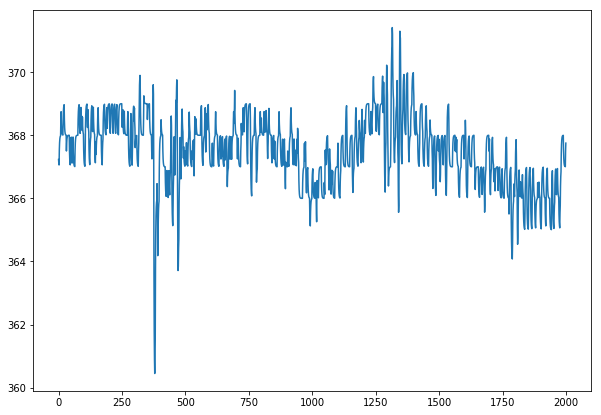

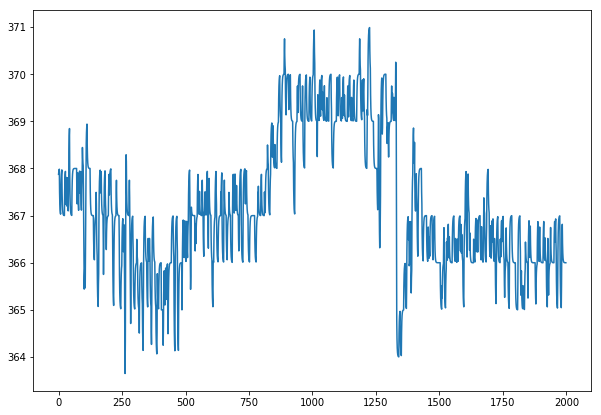

In [212]:
start = datetime.datetime.now()
timer_train = []
timer_test = []
batch_train = []
batch_test = []
n = 4000
border = 6000
num = 8000
for i in range (0, border-n):
    timer_train.append(sheet.cell(row = i+n, column = 8).value)
    batch_train.append(float(sheet.cell(row = i+n, column = 2).value))
for j in range (border-n, num-n-1):
    timer_test.append(sheet.cell(row = i+n, column = 8).value)
    batch_test.append(float(sheet.cell(row = j+n, column = 2).value))
plt.plot(batch_train)
plt.show()
plt.plot(batch_test)
plt.show()

    

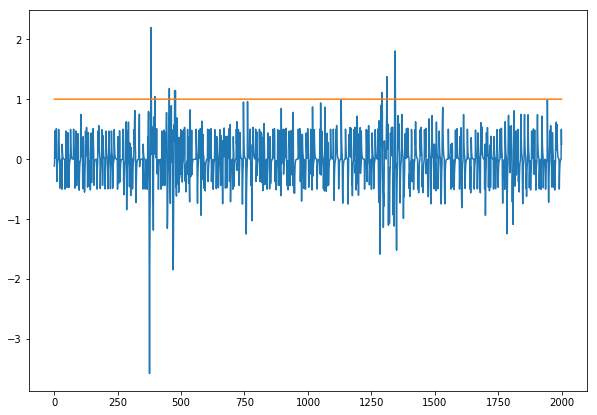

In [213]:
df1 =  pd.DataFrame(columns = ["flow1", "time"])
df1.time = timer_train
df1.flow1 = batch_train
df1['time'] = df1['time'].diff()
df1['flow1'] = df1['flow1'].diff()
df1.dropna(inplace = True)
plt.plot(df1)

In [214]:
model1 = SARIMAX(df1['flow1'], exog = df1['time'], order=(1, 1, 1), seasonal_order=(2, 0, 1, 15))
result1 = model1.fit()

prog_start = 0

pred1 = result1.get_prediction(start = prog_start, dynamic = False)
forecast_values1 = pred1.predicted_mean

C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [215]:
difference = np.mean(forecast_values1 - batch_test)
forecast_mse1 = np.sqrt(((forecast_values1 - batch_test) ** 2).mean())
print(forecast_mse1, difference)

367.18393635183025 -367.1810877054595


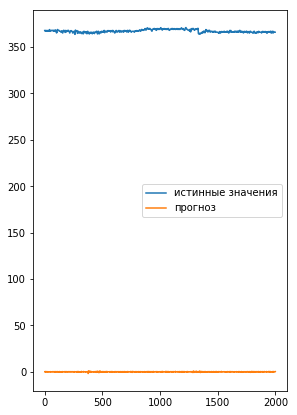

In [216]:
#forecast_mse1 = ((forecast_values1 - batch_test) ** 2).mean()
    
figure = pylab.subplot(1,2,2)
figure1 = pylab.plot(batch_test, label = "истинные значения")
figure2 = pylab.plot(forecast_values1, label = "прогноз")
pylab.legend()

In [152]:
def params_optimization(dataset, dataset_test, seasonal, non_seasonal, cycles):
    for i in range (10, cycles):
        seasonal[3] = i
        try:
            model1 = SARIMAX(df1, order=(1, 1, 1), seasonal_order=seasonal, trend = [1, 1, 0, 1])
            result1 = model1.fit()
        except:
            continue
        pred1 = result1.get_prediction(start = prog_start, dynamic = False)
        forecast_values1 = pred1.predicted_mean
        difference = np.mean(forecast_values1 - dataset_test)
        forecast_mse_temp = np.sqrt(((forecast_values1 - dataset_test) ** 2).mean())
        print(seasonal, difference, forecast_mse_temp)  
    return [difference, forecast_mse_temp]
    

In [126]:
params_non_seasonal = [1, 1, 1]
params_seasonal = [2, 1, 1, 10]
print(params_optimization(df1, batch_train, params_seasonal, params_non_seasonal, 27))


[2, 1, 1, 10] 0.4227470034230786 18.94740258191674
[2, 1, 1, 11] 0.42185270950590104 18.94718994401056
[2, 1, 1, 12] 0.42226473510671536 18.93998535213238
[2, 1, 1, 13] 0.42155613434830425 18.935604081058372
[2, 1, 1, 14] 0.42150740551274973 18.933124863022933
[2, 1, 1, 15] 0.4215907665550055 18.93222197777924
[2, 1, 1, 16] 0.4221131988244312 18.939215363781294
[2, 1, 1, 17] 0.42287949968756433 18.94999928267978
[2, 1, 1, 18] 0.42262829085866116 18.95604122986784
[2, 1, 1, 19] 0.42228365530158246 18.959212794508638
[2, 1, 1, 20] 0.42213522686152666 18.960145293517094
[2, 1, 1, 21] 0.42224331955227734 18.95313994611568
[2, 1, 1, 22] 0.4225018100332469 18.95001526752881
[2, 1, 1, 23] 0.4217493711064784 18.95602448636179
[2, 1, 1, 24] 0.42156323815129426 18.95898811419191
[2, 1, 1, 25] 0.4217347959161512 18.9603036175946
[2, 1, 1, 26] 0.4218119175725284 18.960491487903166
[0.4218119175725284, 18.960491487903166]


In [12]:
print(params_seasonal, params_non_seasonal)

[2, 1, 1, 10] [1, 1, 1]
